In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

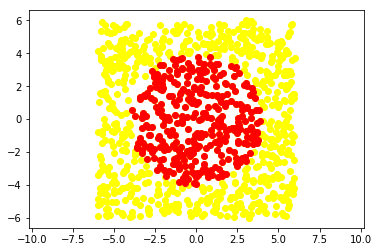

In [2]:
n=1000
#create a circle
x1 = np.array([np.random.uniform(-6,6) for i in range(n)])
x2 = np.array([np.random.uniform(-6,6) for i in range(n)])

circle=pd.DataFrame(x1,columns=['x1'])
circle['x2']=x2 
circle['x1^2']=circle['x1']**2
circle['x2^2']=circle['x1']**2
circle['y']=(circle['x1']**2+circle['x2']**2).apply(lambda x: 1 if x<=16 else 0)

plt.scatter(circle['x1'],circle['x2'],color='yellow')
plt.scatter(circle[circle['y']==1]['x1'],circle[circle['y']==1]['x2'],color='red')
plt.axis("equal")
plt.show()

#true circle
fig=plt.figure(1)
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0,0), radius=4, color='black', fill=False)
ax.add_patch(circ)

X=np.asarray(circle[['x1','x2']]) 
Y=np.asarray(circle[['y']])

# Sigmoid

In [3]:
input_size=2
hidden1_layer_size=7
hidden2_layer_size=7
#I added more neurons in hidden layer to have too many parameters to adjust
output_layer_size=1
x = tf.placeholder(tf.float32,shape=[None,input_size])
y = tf.placeholder(tf.float32,shape=[None,output_layer_size])

W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden1_layer_size], -1, 1))
b_layer1 = tf.Variable(tf.zeros([hidden1_layer_size]))

W_layer2 = tf.Variable(tf.random_uniform([hidden1_layer_size,hidden2_layer_size], -1, 1))
b_layer2 = tf.Variable(tf.zeros([hidden2_layer_size]))

W_layer3 = tf.Variable(tf.random_uniform([hidden2_layer_size,output_layer_size], -1, 1))
b_layer3 = tf.Variable(tf.zeros([output_layer_size]))

hidden_layer1 = tf.nn.sigmoid(tf.matmul(x, W_layer1) + b_layer1) 
hidden_layer2 = tf.nn.sigmoid(tf.matmul(hidden_layer1, W_layer2) + b_layer2) 
prediction = tf.nn.sigmoid(tf.matmul(hidden_layer2, W_layer3) + b_layer3)

lossfn = tf.reduce_mean(tf.reduce_sum((Y-prediction)**2))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

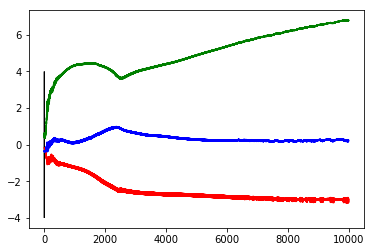

In [4]:
# Let's save weights of each iteration 
#To show different rates of learning let's take weights of one neurons from input and intermediate layers
delta_w1 = []
delta_w2 = []
delta_w3 = []
for i in range(10000):
    sess.run(optimizer, feed_dict={x: X, y: Y})
    W1 = sess.run(W_layer1)
    W2 = sess.run(W_layer2)
    W3 = sess.run(W_layer3)
    delta_w1.append(W1[0,0])
    delta_w2.append(W2[0,0])
    delta_w3.append(W3[0,0])

z = range(10000)
plt.plot(z, delta_w1, 'red') 
plt.plot(z, delta_w2, 'blue')  
plt.plot(z, delta_w3, 'green')  
plt.show()
sess.close()

# ReLu

In [5]:
hidden_layer1 = tf.nn.relu(tf.matmul(x, W_layer1) + b_layer1) 
hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, W_layer2) + b_layer2) 
prediction = tf.nn.relu(tf.matmul(hidden_layer2, W_layer3) + b_layer3)

lossfn = tf.reduce_mean(tf.reduce_sum((Y-prediction)**2))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

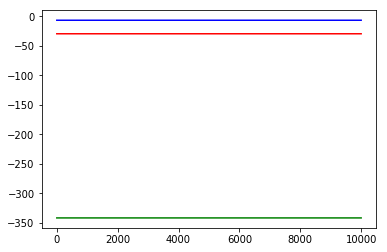

In [6]:
# Let's save weights of each iteration 
#To show different rates of learning let's take weights of one neurons from input and intermediate layers
delta_w1 = []
delta_w2 = []
delta_w3 = []
for i in range(10000):
    sess.run(optimizer, feed_dict={x: X, y: Y})
    W1 = sess.run(W_layer1)
    W2 = sess.run(W_layer2)
    W3 = sess.run(W_layer3)
    delta_w1.append(W1[0,0])
    delta_w2.append(W2[0,0])
    delta_w3.append(W3[0,0])

z = range(10000)
plt.plot(z, delta_w1, 'red') 
plt.plot(z, delta_w2, 'blue')  
plt.plot(z, delta_w3, 'green')  
plt.show()
sess.close()

# Tanh

In [7]:
hidden_layer1 = tf.nn.tanh(tf.matmul(x, W_layer1) + b_layer1) 
hidden_layer2 = tf.nn.tanh(tf.matmul(hidden_layer1, W_layer2) + b_layer2) 
prediction = tf.nn.tanh(tf.matmul(hidden_layer2, W_layer3) + b_layer3)

lossfn = tf.reduce_mean(tf.reduce_sum((Y-prediction)**2))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

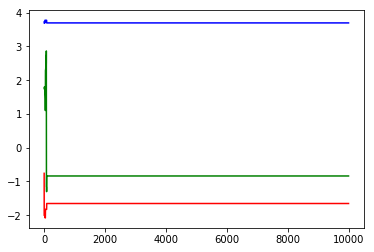

In [8]:
# Let's save weights of each iteration 
#To show different rates of learning let's take weights of one neurons from input and intermediate layers
delta_w1 = []
delta_w2 = []
delta_w3 = []
for i in range(10000):
    sess.run(optimizer, feed_dict={x: X, y: Y})
    W1 = sess.run(W_layer1)
    W2 = sess.run(W_layer2)
    W3 = sess.run(W_layer3)
    delta_w1.append(W1[0,0])
    delta_w2.append(W2[0,0])
    delta_w3.append(W3[0,0])

z = range(10000)
plt.plot(z, delta_w1, 'red') 
plt.plot(z, delta_w2, 'blue')  
plt.plot(z, delta_w3, 'green')  
plt.show()
sess.close()